### <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#0e92ea"> The Project: ReCell

### <span style="font-weight:bold; color:dark green"> Description: 

<p style='text-align: justify;'> Buying and selling used smartphones used to be something that happened on a handful of online marketplace sites. But the used and refurbished phone market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth $52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used smartphones that offer considerable savings compared with new models.</p>
    
<p style='text-align: justify;'> Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing a smartphone. There are plenty of other benefits associated with the used smartphone market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished smartphones. Maximizing the longevity of mobile phones through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost the cheaper refurbished smartphone segment, as consumers cut back on discretionary spending and buy phones only for immediate needs.</p>

### <span style="font-weight:bold; color:dark green"> Objective
<p style='text-align: justify;'>The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished smartphones. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone and identify factors that significantly influence it.</p>

### <span style="font-weight:bold; color:dark green"> Data Dictionary

1. **brand_name**: Name of manufacturing brand.

2. **os**: OS on which the phone runs.

3. **screen_size**: Size of the screen in cm.

4. **4g**: Whether 4G is available or not.

5. **5g**: Whether 5G is available or not.

6. **main_camera_mp**: Resolution of the rear camera in megapixels.

7. **selfie_camera_mp**: Resolution of the front camera in megapixels.

8. **int_memory**: Amount of internal memory (ROM) in GB.

9. **ram**: Amount of RAM in GB.

10. **battery**: Energy capacity of the phone battery in mAh.

11. **weight**: Weight of the phone in grams.

12. **release_year**: Year when the phone model was released.

13. **days_used**: Number of days the used/refurbished phone has been used.

14. **new_price**: Price of a new phone of the same model in euros.

15. **used_price**: Price of the used/refurbished phone in euros.

### <span style="font-weight:bold; color:dark green"> Key Questions:

1. What does the distribution of used phone prices look like?
2. What percentage of the used phone market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a phone. How does the amount of RAM vary with the brand?
4. A large battery often increases a phone's weight, making it feel uncomfortable in the hands. How does the weight vary for phones offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones are available across different brands with a screen size larger than 6 inches?
6. Budget phones nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of budget phones offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the used phone price?

### <span style="font-weight:bold; color:dark blue"> Importing necessary libraries and data

In [550]:
# this will help in making the Python code more structured automatically (good coding practice)
# %load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time
import calendar
# to build linear regression_model using statsmodels
import statsmodels.api as sm
import warnings 
warnings.filterwarnings("ignore") # to avoid warnings

### Data Overview

- Observations
- Sanity checks

#### Read the csv file

In [551]:
# loading the dataset
df = pd.read_csv("used_phone_data.csv")
np.random.seed(1)
df.sample(n=10)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
2501,Samsung,Android,13.49,yes,no,13.0,13.0,32.0,4.00,3600.0,181.0,2017,683,198.680,79.47
2782,Sony,Android,13.81,yes,no,NaN,8.0,32.0,4.00,3300.0,156.0,2019,195,198.150,149.10
605,Others,Android,12.70,yes,no,8.0,5.0,16.0,4.00,2400.0,137.0,2015,1048,161.470,48.39
2923,Vivo,Android,19.37,yes,no,13.0,16.0,64.0,4.00,3260.0,149.3,2019,375,211.880,138.31
941,Others,Others,5.72,no,no,0.3,0.3,32.0,0.25,820.0,90.0,2013,883,29.810,8.92
1833,LG,Android,13.49,no,no,8.0,1.3,32.0,4.00,3140.0,161.0,2013,670,240.540,96.18
671,Apple,iOS,14.92,yes,no,12.0,7.0,64.0,4.00,5493.0,48.0,2018,403,700.150,350.08
1796,LG,Android,17.78,yes,no,5.0,0.3,16.0,4.00,4000.0,294.8,2014,708,189.300,75.94
757,Asus,Android,13.49,yes,no,13.0,8.0,32.0,4.00,5000.0,181.0,2017,612,270.500,108.13
3528,Realme,Android,15.72,yes,no,NaN,16.0,64.0,4.00,4035.0,184.0,2019,433,159.885,80.00


### Checking the Data

In [552]:
# check number of rows and columns
df.shape # we have a dataset of 3571 rows and 15 columns.

(3571, 15)

In [553]:
# take a look at the column names
df.columns

Index(['brand_name', 'os', 'screen_size', '4g', '5g', 'main_camera_mp',
       'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight',
       'release_year', 'days_used', 'new_price', 'used_price'],
      dtype='object')

In [554]:
# checking column datatypes and number of non-null values
df.info() # the info function shows the type of data stored in the dataset. included: object, int, and float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3571 entries, 0 to 3570
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand_name        3571 non-null   object 
 1   os                3571 non-null   object 
 2   screen_size       3571 non-null   float64
 3   4g                3571 non-null   object 
 4   5g                3571 non-null   object 
 5   main_camera_mp    3391 non-null   float64
 6   selfie_camera_mp  3569 non-null   float64
 7   int_memory        3561 non-null   float64
 8   ram               3561 non-null   float64
 9   battery           3565 non-null   float64
 10  weight            3564 non-null   float64
 11  release_year      3571 non-null   int64  
 12  days_used         3571 non-null   int64  
 13  new_price         3571 non-null   float64
 14  used_price        3571 non-null   float64
dtypes: float64(9), int64(2), object(4)
memory usage: 418.6+ KB


In [555]:
df.isnull().sum() #checking the missing values in the dataset. 

brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
main_camera_mp      180
selfie_camera_mp      2
int_memory           10
ram                  10
battery               6
weight                7
release_year          0
days_used             0
new_price             0
used_price            0
dtype: int64

**Observations**
1. There are 6 columns with missing values. 
2. **main_camera_mp** has the highest number of missing values.
3. The missing data could be replaced with **median** or **mean** values. 
4. regarding the low number of the missing values, they will be dropped

In [556]:
df.dropna(inplace=True)#eliminating others NAN

In [557]:
df.isnull().sum()#checking null

brand_name          0
os                  0
screen_size         0
4g                  0
5g                  0
main_camera_mp      0
selfie_camera_mp    0
int_memory          0
ram                 0
battery             0
weight              0
release_year        0
days_used           0
new_price           0
used_price          0
dtype: int64

In [558]:
df.shape

(3368, 15)

### Data Extraction

In [559]:
data_description = df.describe(include="number").T
data_compare = pd.concat([data_description, df.median()], axis=1)
data_compare = data_compare.rename({0:'median'}, axis=1)
data_compare

,count,mean,std,min,25%,50%,75%,max,median
screen_size,3368.0,14.575095,5.045491,2.700,11.430,13.490,16.0300,46.36,13.490
main_camera_mp,3368.0,9.419519,4.803271,0.080,5.000,8.000,13.0000,48.00,8.000
selfie_camera_mp,3368.0,6.096437,6.513867,0.300,2.000,5.000,8.0000,32.00,5.000
int_memory,3368.0,52.056596,85.108736,0.005,16.000,32.000,64.0000,1024.00,32.000
ram,3368.0,3.980950,1.271313,0.030,4.000,4.000,4.0000,16.00,4.000
battery,3368.0,3008.418795,1361.468949,80.000,2050.000,3000.000,3900.0000,12000.00,3000.000
weight,3368.0,179.050193,92.185768,23.000,140.000,157.000,180.0000,950.00,157.000
release_year,3368.0,2015.776128,2.188557,2013.000,2014.000,2015.000,2018.0000,2020.00,2015.000
days_used,3368.0,695.176960,236.186405,91.000,563.000,704.000,880.2500,1094.00,704.000
new_price,3368.0,232.343347,193.070557,9.130,119.905,189.145,281.3475,2560.20,189.145


**Observations**
1. The used price is right skewed with mean > median. 
2. The new price is right skewed too with mean > median. 
3. The average used days is approximately two years. 
4. The phones are mostly dominated by ram of 4 GB.
5. The ram is almost a constant value which raise questions about its relevance as a variable
6. The battery is approximately normally distributed with mean ~ median.
7. The release year could be binned on percentile values or dummies as its ordinal values

In [560]:
brand_list = df['brand_name'].unique()

In [561]:
len(brand_list)

33

In [562]:
a = pd.DataFrame(df.groupby(['brand_name']).count(), columns={'screen_size'})
a=a.dropna()
a = a.rename({'screen_size':'count'}, axis=1)
a=a.sort_values(by='count', ascending=False)
a.head(10)

,count
brand_name,
Others,509
Samsung,364
Huawei,264
LG,212
Lenovo,172
ZTE,137
Alcatel,125
Asus,122
Micromax,120


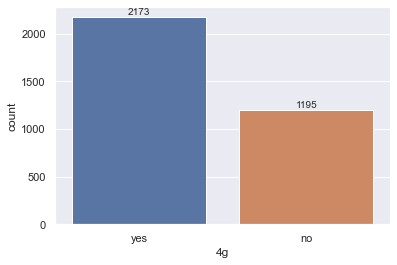

In [563]:
ax = sns.countplot(x='4g', data=df) #defining a countplot for Gender and MaritalStatus

for p in ax.patches: #printing value of each plot
    label = p.get_height()
    x = p.get_x() + p.get_width() / 2  # width of the plot
    y = p.get_height()  # height of the plot
    ax.annotate(label, (x,y), ha='center', va='center', size=10, xytext=(0,5), textcoords='offset points')
    
plt.show()#printing the graph    

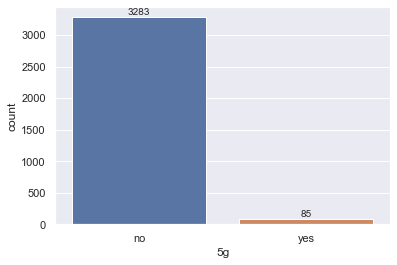

In [564]:
ax = sns.countplot(x='5g', data=df) #defining a countplot for Gender and MaritalStatus

for p in ax.patches: #printing value of each plot
    label = p.get_height()
    x = p.get_x() + p.get_width() / 2  # width of the plot
    y = p.get_height()  # height of the plot
    ax.annotate(label, (x,y), ha='center', va='center', size=10, xytext=(0,5), textcoords='offset points')
    
plt.show()#printing the graph    

In [565]:
c = pd.DataFrame(df.groupby('os').count(), columns={'screen_size'})
c=c.dropna()
c = c.rename({'screen_size':'count'}, axis=1)
c=c.sort_values(by='count', ascending=False)
c.head(20)

,count
os,
Android,3056
Others,191
Windows,65
iOS,56


##### Converting the type of objects and few numerical to categories.   

**Observations**
1. Android is the leading os system on all brands 
2. There are 34 types of brand names. 
3. Most of the used phones are operating with 4G. 
4. There is a question around Phones which are not 4g or 5g (3g ? or mistake ?). This raise question around the quality of this variable.
5. Market is widely fragmented as Samsung represent only 10% of all used_phones, Huawei and LG represents only 7,4% and 6% respectively

In [566]:
cat_vars = ['os', '4g', '5g', 'brand_name', 'release_year','ram'] 
#we select object variables but also release_year and ram for a bin-liked treatment through dummies

for colname in cat_vars:
   df[colname] = df[colname].astype('category')

In [567]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3368 entries, 0 to 3570
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   brand_name        3368 non-null   category
 1   os                3368 non-null   category
 2   screen_size       3368 non-null   float64 
 3   4g                3368 non-null   category
 4   5g                3368 non-null   category
 5   main_camera_mp    3368 non-null   float64 
 6   selfie_camera_mp  3368 non-null   float64 
 7   int_memory        3368 non-null   float64 
 8   ram               3368 non-null   category
 9   battery           3368 non-null   float64 
 10  weight            3368 non-null   float64 
 11  release_year      3368 non-null   category
 12  days_used         3368 non-null   int64   
 13  new_price         3368 non-null   float64 
 14  used_price        3368 non-null   float64 
dtypes: category(6), float64(8), int64(1)
memory usage: 445.9 KB


In [568]:
# check the number of unique values in each column of the dataframe
df.nunique()

brand_name            33
os                     4
screen_size          125
4g                     2
5g                     2
main_camera_mp        44
selfie_camera_mp      36
int_memory            16
ram                   14
battery              345
weight               597
release_year           8
days_used            886
new_price           2949
used_price          2860
dtype: int64

In [569]:
df.release_year.value_counts()

2014    655
2013    586
2015    524
2019    419
2016    395
2018    321
2017    311
2020    157
Name: release_year, dtype: int64

**Observations**
1. The models are produced between 2014 & 2020. 
2. phones produced between 2013 and 2015 weight ~50% of all used_phones

In [570]:
df.int_memory.value_counts()

16.000      1334
32.000      1079
64.000       465
128.000      301
256.000       77
512.000       45
4.000         23
8.000         13
0.005          9
1024.000       8
0.020          5
0.500          4
0.200          2
0.010          1
0.060          1
24.000         1
Name: int_memory, dtype: int64

In [571]:
df.ram.value_counts()

4.0     2858
6.0      109
0.25     103
8.0       90
2.0       70
3.0       65
1.0       37
0.5       11
12.0      10
16.0       4
2.5        4
0.03       3
1.5        2
0.75       2
Name: ram, dtype: int64

**Observations**
1. The used phones are dominated by types wit 4GB ram.
2. The used phones are dominated by 16Go and 32 Go internal memory which represents 68% of total

## Exploratory Data Analysis (EDA)

### Univariate & Bivariate Analysis

<font color=darkblue> In this analysis multiple factors, such as, preferred language, conversion rate, time spent on each page, etc. will be individually assessed to obtain in depth understanding of the relationship between each factor and the products being reviewed. 

In [572]:
def histogram_boxplot(data, feature, kde=True, figsize=(12, 7), bins=None):
    """
    Boxplot and histogram combined
    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    mode = data[feature].mode()
    
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram
    ax_hist2.axvline(mode[0], color="red", linestyle='-')
        #Add mode to the histogram

In [573]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

## Numeric Variables

In [574]:
numeric_col = df.select_dtypes(include=np.number).columns.to_list()
numeric_col

['screen_size',
 'main_camera_mp',
 'selfie_camera_mp',
 'int_memory',
 'battery',
 'weight',
 'days_used',
 'new_price',
 'used_price']

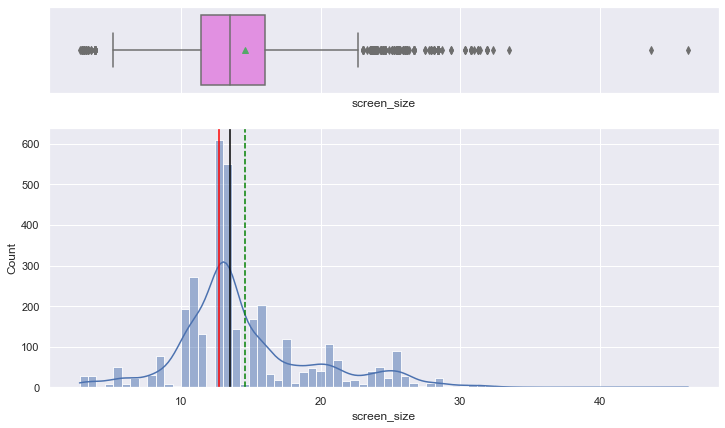

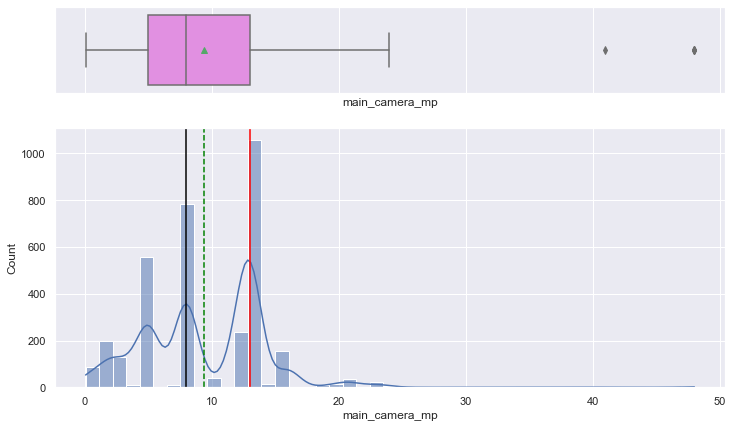

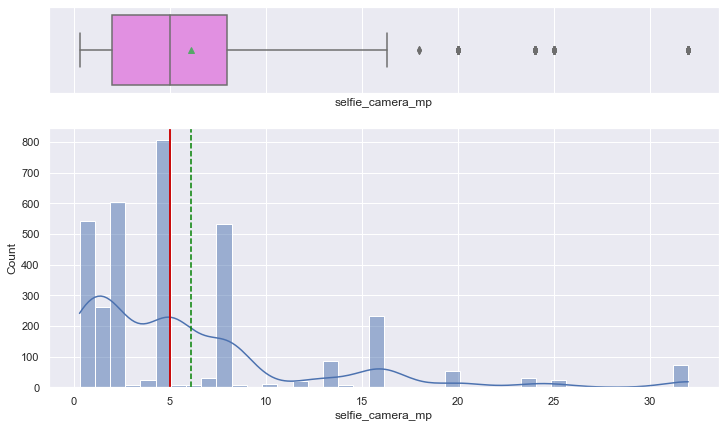

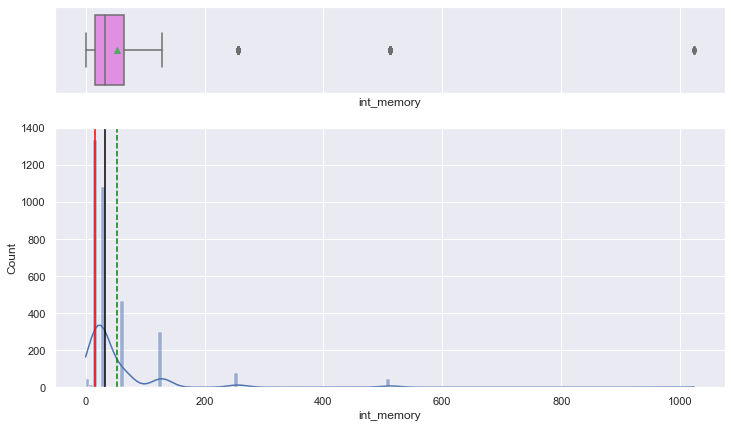

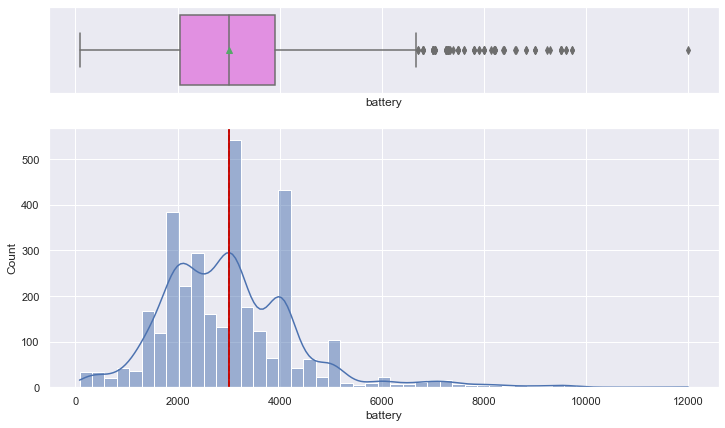

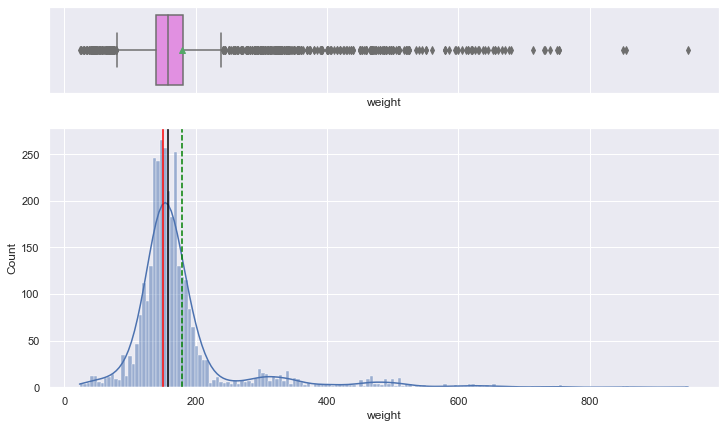

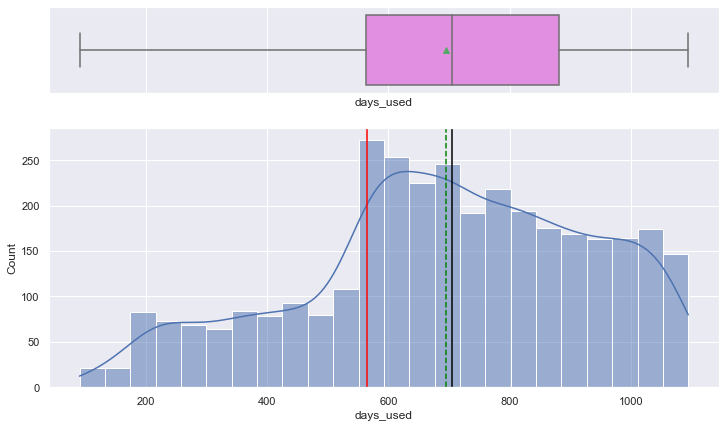

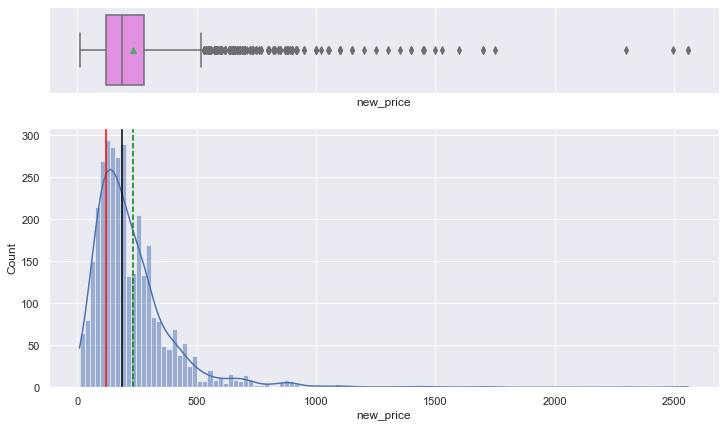

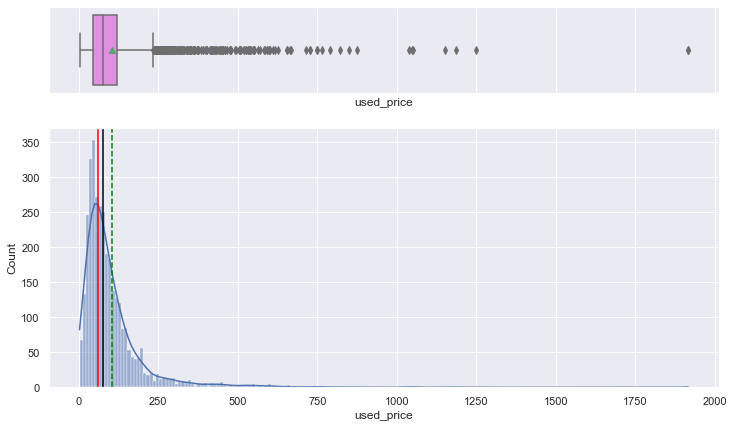

In [575]:
for col in numeric_col:
    histogram_boxplot(df, col)

**Observations**

1. weight is normaly distributed 
2. new_price and used_price are right skewed
3. There are many outliers on new_price, used_price, weight, battery and screen_size.
4. outliers treatment must be appreciated as all outliers have not necessary the same weight. Some outliers are usefull because they have meaning, others should be treated because they are non relevant. At this point, we suggest to keep price outliers as these data may have sense.
5. the price range is high either in new_price or in used_price thus we suggest a logarithmic or a square root transformation before treating these data in the Linear Regression Model


###  Brand Name

### Univariate & Bivariate Analysis

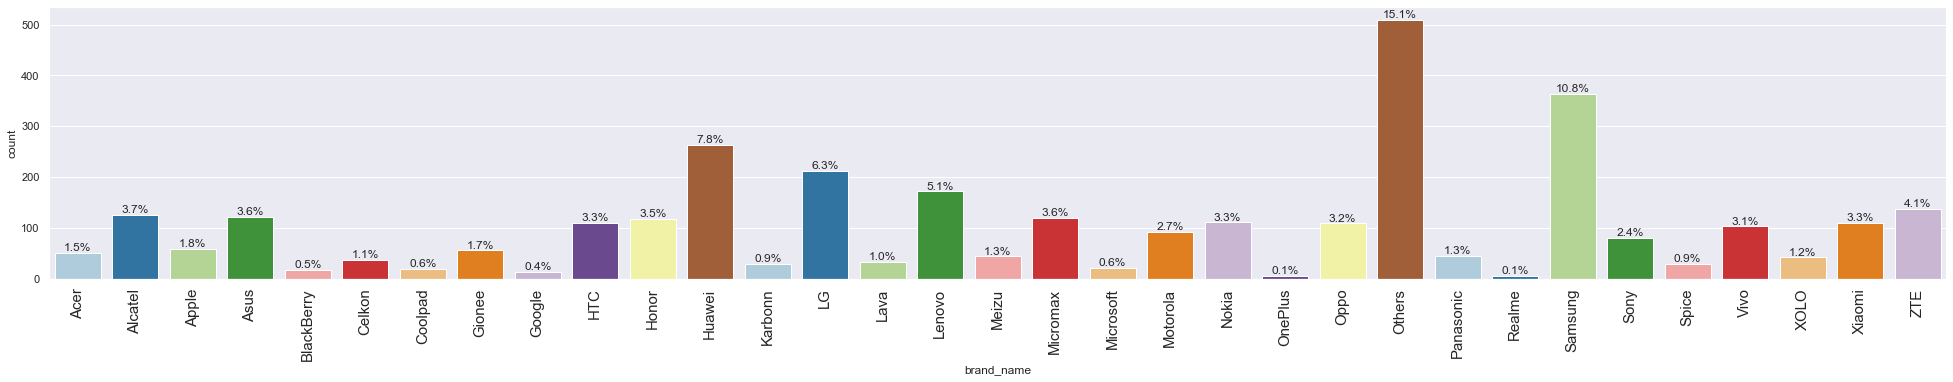

In [576]:
labeled_barplot(df, "brand_name", perc=True)

### Brand Name vs. New Price

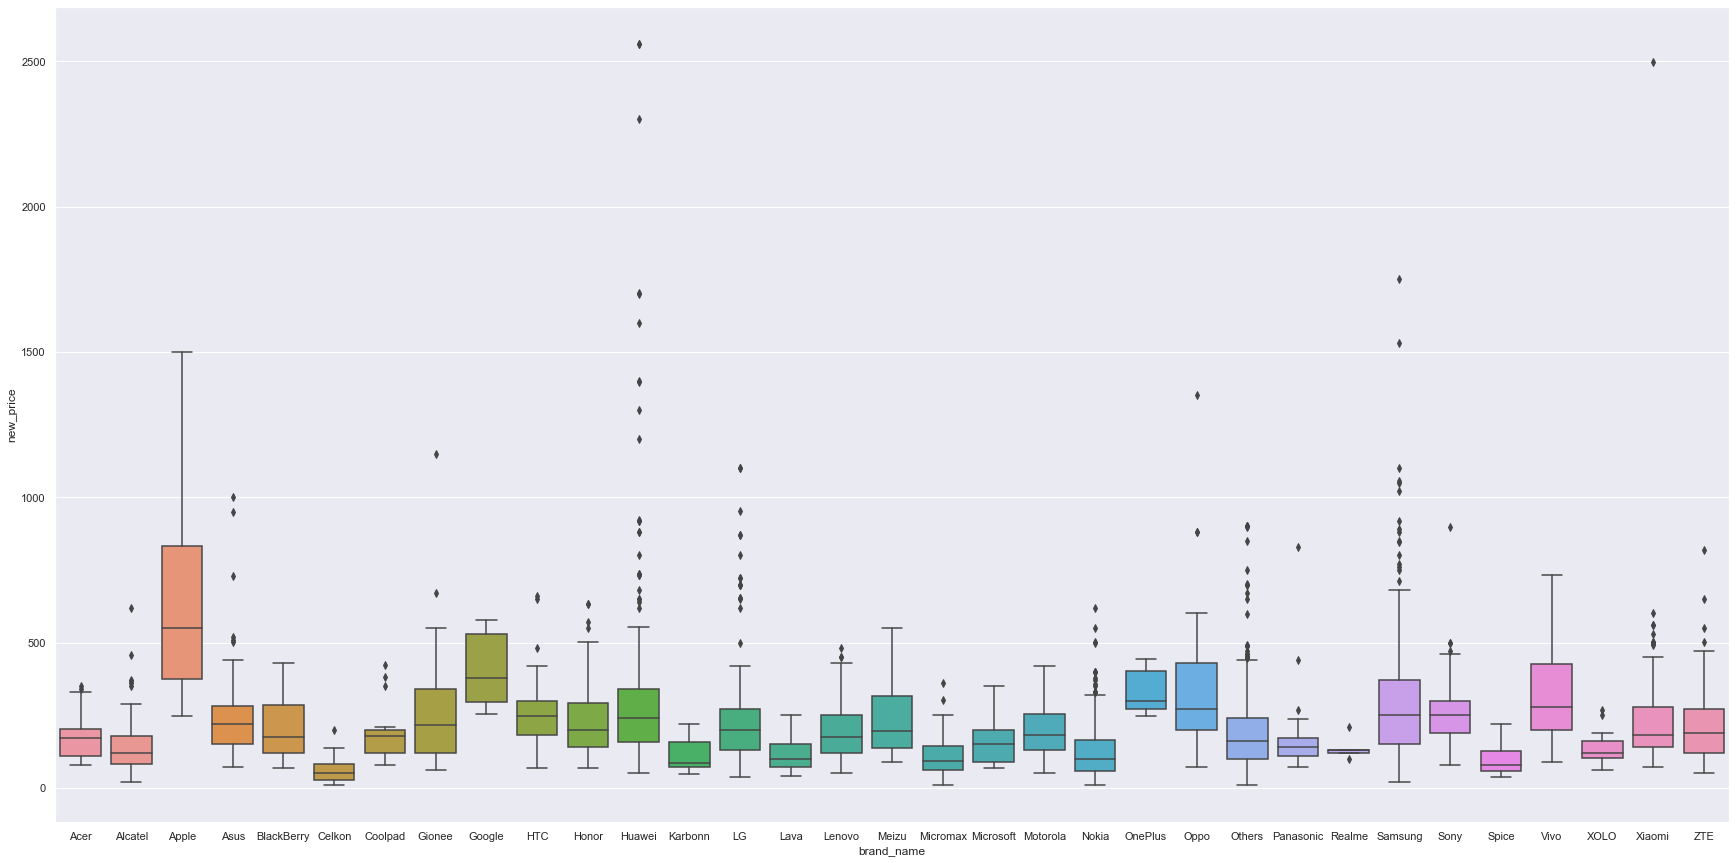

In [577]:
plt.figure(figsize=(30, 15))
sns.boxplot(df['brand_name'], df['new_price']);

In [578]:
brand_list=df['brand_name'].unique().to_list()
price_compare=pd.DataFrame(index=brand_list, columns={'new_price_mean', 'used_price_mean', 'diff'})
price_compare['new_price_mean']=df.groupby('brand_name')['new_price'].mean()
price_compare['used_price_mean']=df.groupby('brand_name')['used_price'].mean()
price_compare['diff'] = price_compare['new_price_mean'] - price_compare['used_price_mean']
price_compare = price_compare.sort_values(by='diff', ascending=False)
price_compare.head(100)


,diff,new_price_mean,used_price_mean
Apple,345.776127,639.004941,293.228814
OnePlus,227.402000,331.980000,104.578000
Google,202.177692,408.600000,206.422308
Oppo,166.422606,317.009761,150.587156
Gionee,163.497321,255.379286,91.881964
Samsung,161.771038,293.854500,132.083462
Sony,161.387654,260.943210,99.555556
Vivo,159.546646,316.331403,156.784757
HTC,150.227818,249.853818,99.626000
Huawei,147.703197,323.960091,176.256894


### Brand Name vs. Used Price

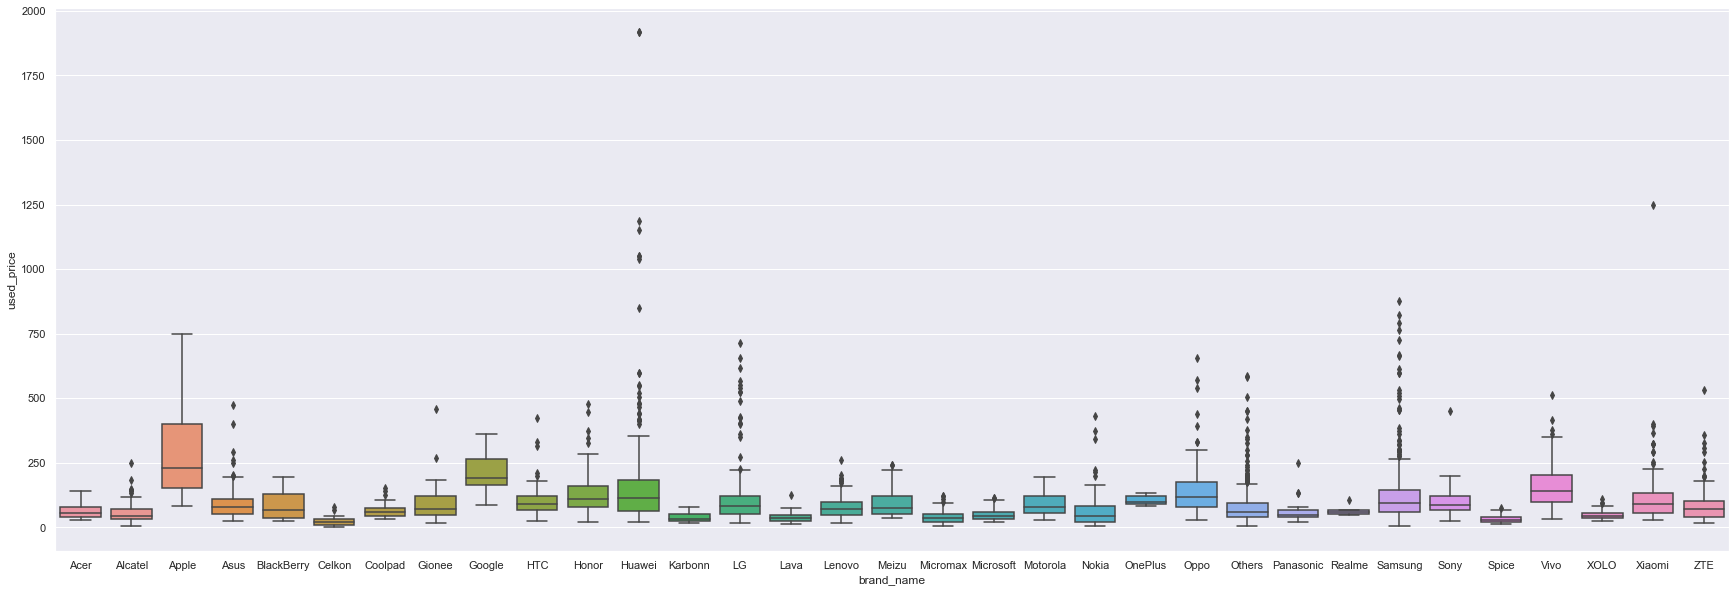

In [579]:
plt.figure(figsize=(30, 10))
sns.boxplot(df['brand_name'], df['used_price']);

### Brand Name vs. Various Attributes

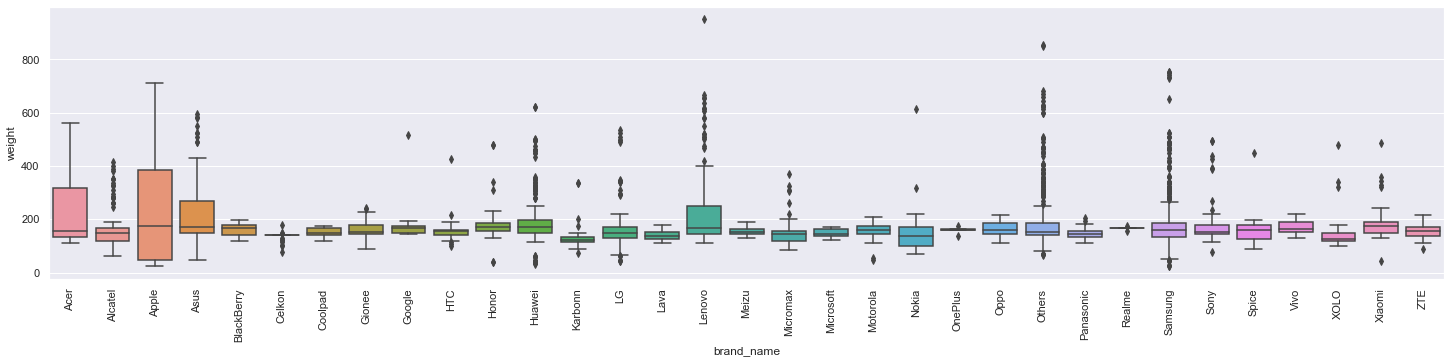

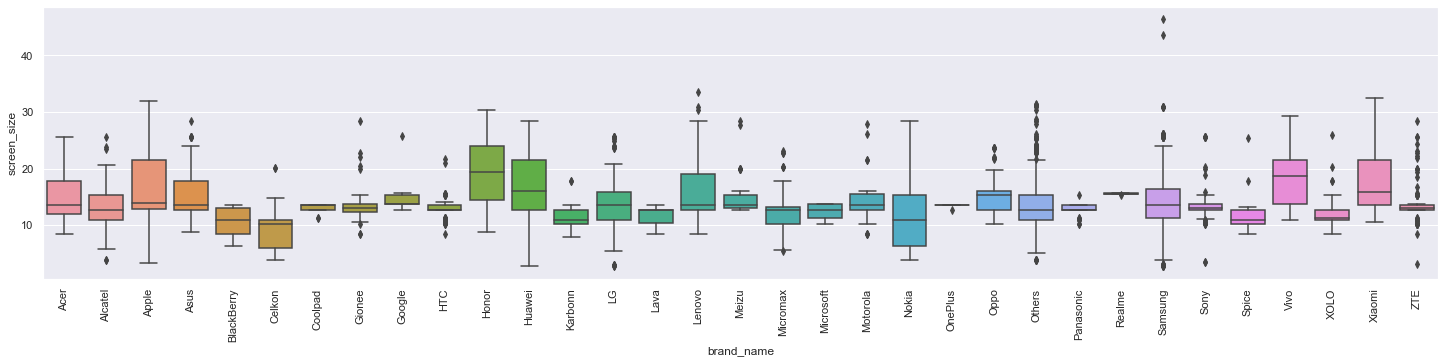

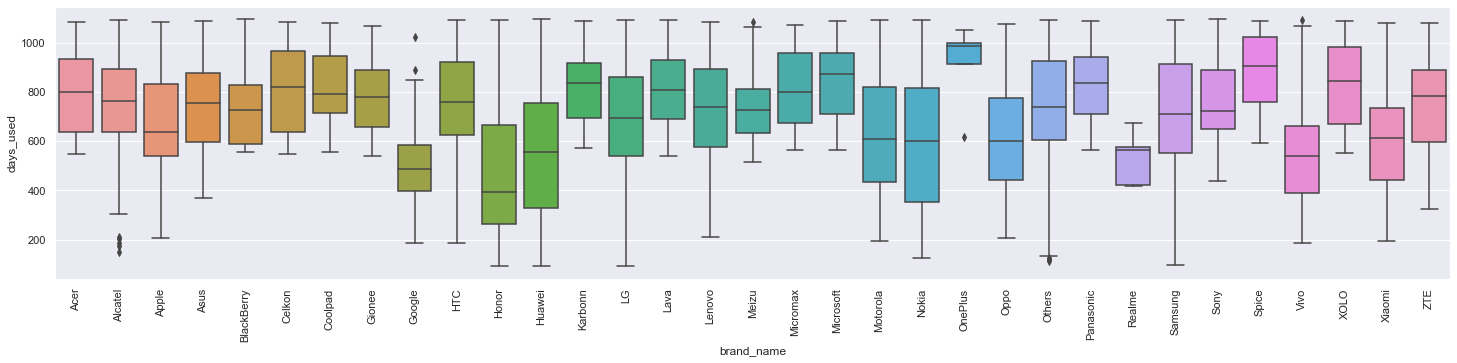

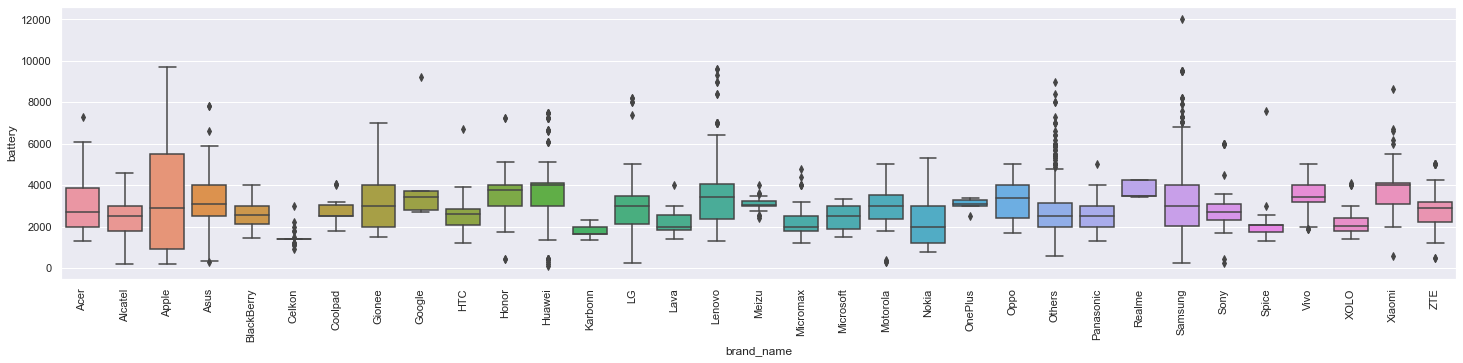

In [580]:
plt.figure(figsize=(25, 5))

sns.boxplot(data=df, y="weight", x="brand_name")
plt.xticks(rotation=90)

plt.show()

plt.figure(figsize=(25,5))
sns.boxplot(data=df, y="screen_size", x="brand_name")
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(25,5))
sns.boxplot(data=df, y="days_used", x="brand_name")
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(25,5))
sns.boxplot(data=df, y="battery", x="brand_name")
plt.xticks(rotation=90)
plt.show()

**Observations**

1. brand prices are very different from a brand to another
2. biggest price differences lies with Apple brand, OnePlus and Gionee
3. Technical differences between different brand is not obvious at this stage


###  Operating System

### Univariate & Bivariate Analysis

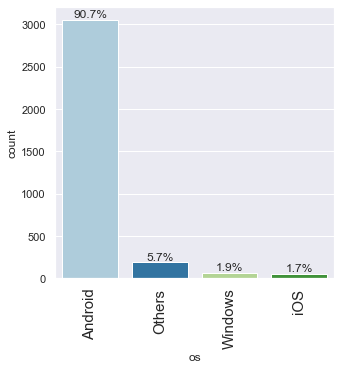

In [581]:
labeled_barplot(df, "os", perc=True)

### Network System

### Univariate & Bivariate Analysis

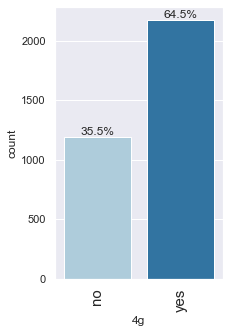

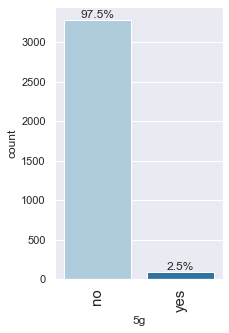

In [582]:
labeled_barplot(df, "4g", perc=True)
labeled_barplot(df, "5g", perc=True)

### Release Year

### Univariate & Bivariate Analysis

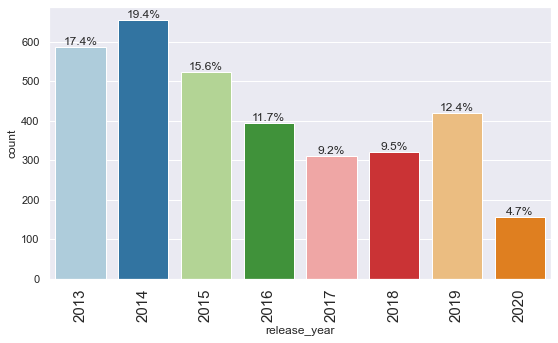

In [583]:
labeled_barplot(df, "release_year", perc=True)

**Observations**

1. As already said Android is dominating the os
2. As already said 4g is widely used. However there are phone with neither 4g nor 5g.
3. As already said most used Phone were produced between 2013 and 2015


### Correlations Analysis

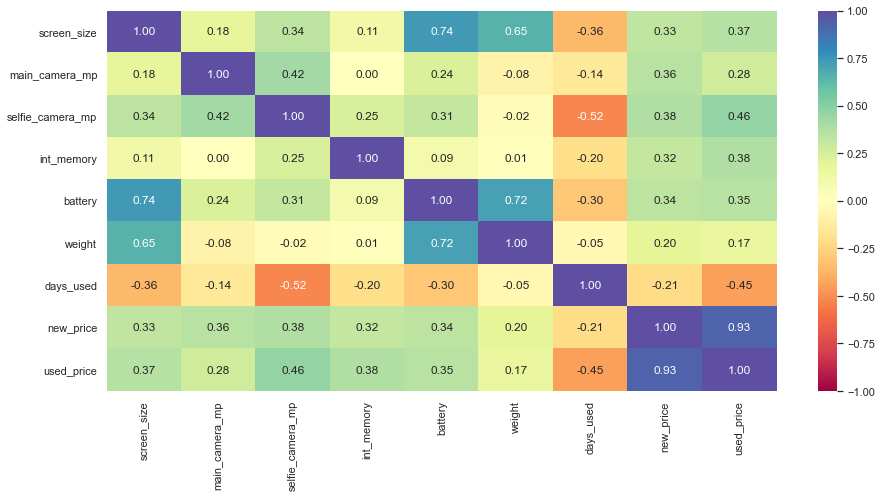

In [584]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

# correlation heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(
    df[numeric_columns].corr(),
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap="Spectral",
)
plt.show()

**Observations**

1. correlation between new_price and used_price is strong (0.9)
2. correlation between battery and screen_size, battery and weight is high
3. No other issues in termes of correlations



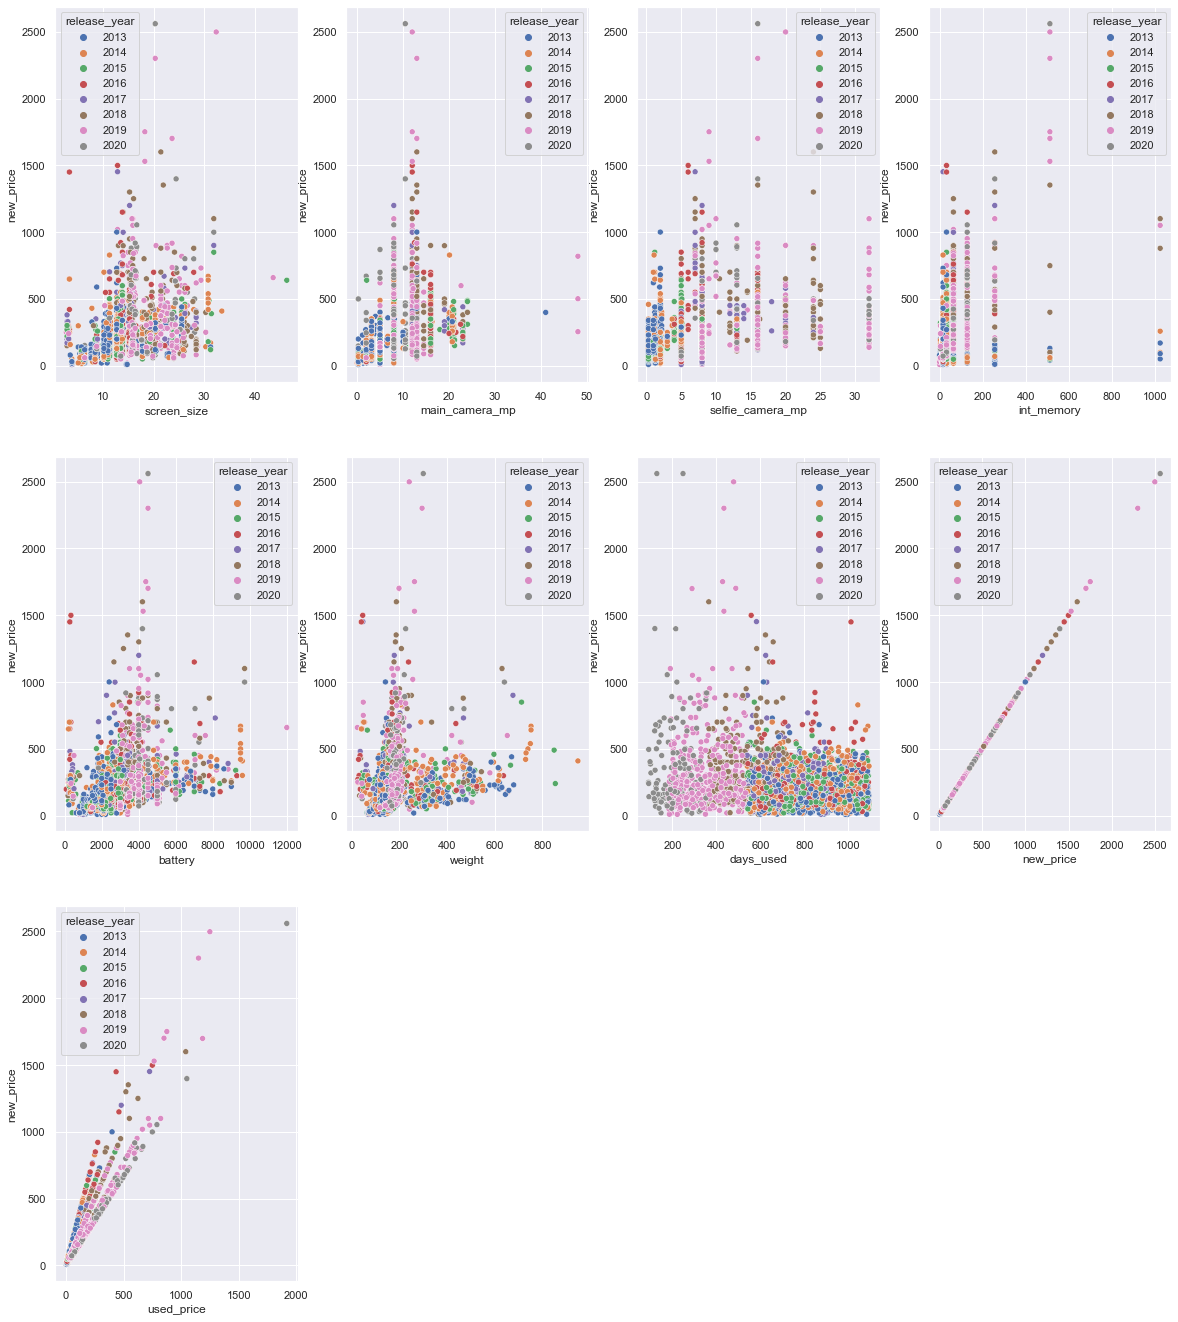

In [585]:
plt.figure(figsize=(20, 40))
#scatterplotting new_price with numeric variables splitted by release_year
for i,col in enumerate(numeric_col):
    plt.subplot(5, 4, i + 1)
    sns.scatterplot(x=col, y='new_price', hue='release_year', data=df)

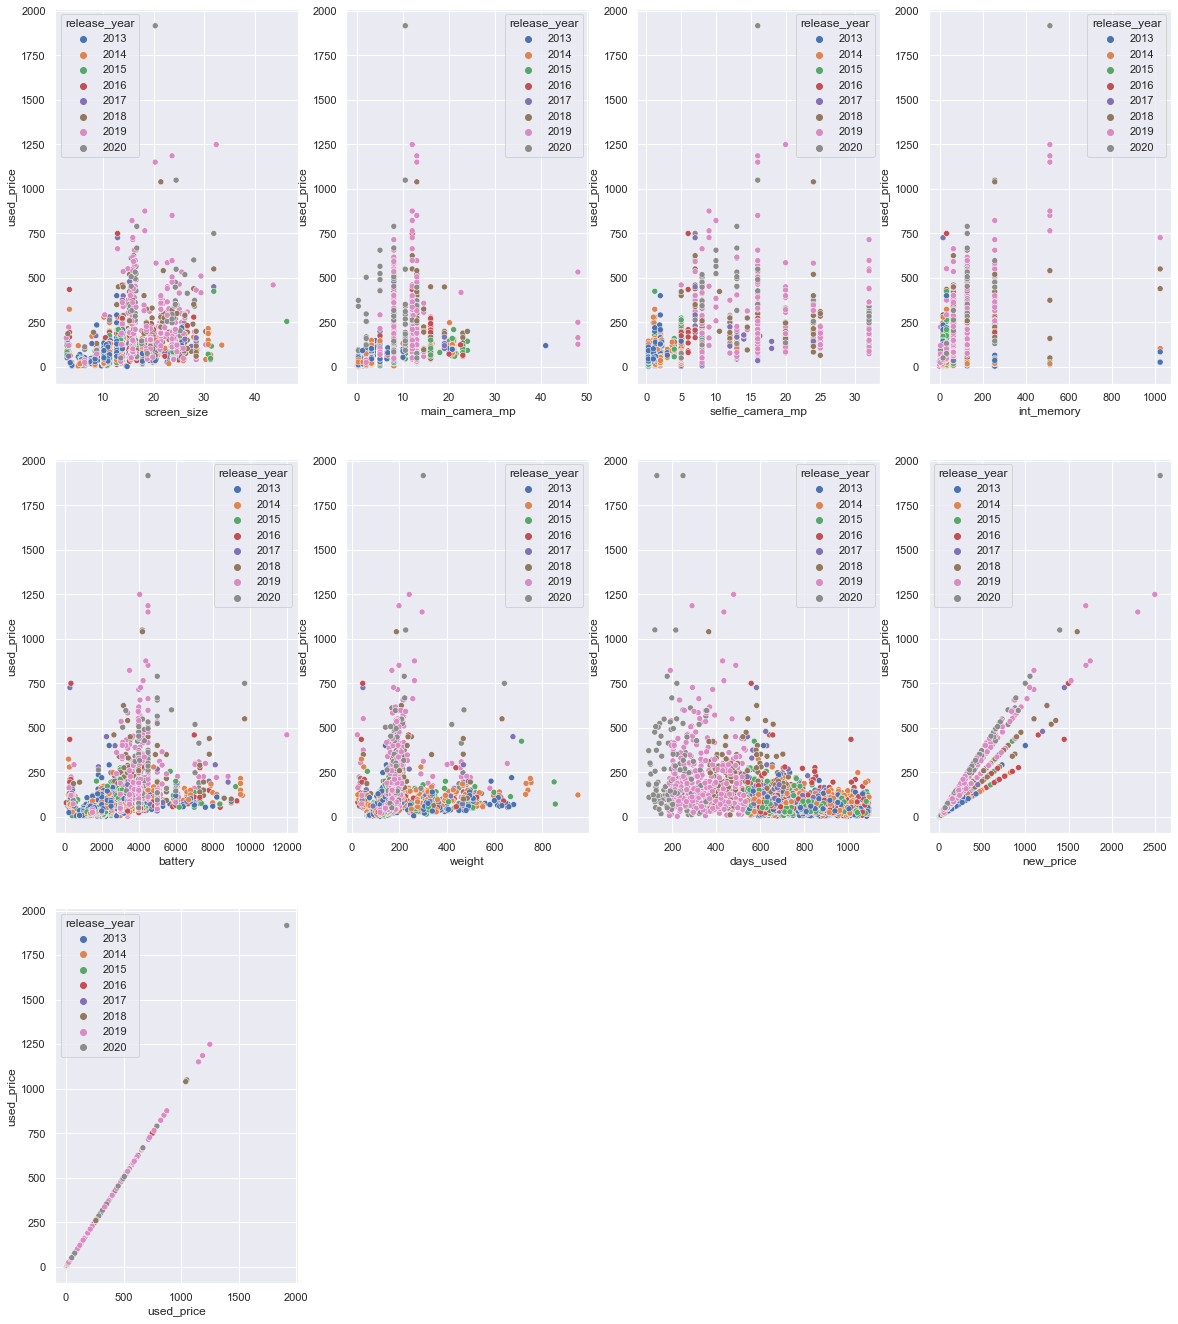

In [586]:
plt.figure(figsize=(20, 40))
#scatterplotting numeric_variables with used_price splitted by release_year
for i,col in enumerate(numeric_col):
    plt.subplot(5, 4, i + 1)
    sns.scatterplot(x=col, y='used_price', hue='release_year', data=df)

**Observations**

1. used_price is not really influenced by other parameters except new_price
2. the release_year gradient show its interest as a bin-liked variable for both new_price and used_price


In [587]:
df1 = df.copy()

## Key Questions Insights & Answers

### <span style="font-family: Arial; font-weight:bold; color:red"> 1. What does the distribution of used phone prices look like?

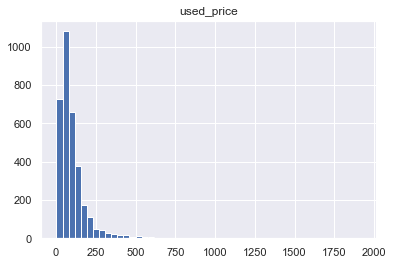

0


In [588]:
dist_used_1 = ['used_price']
for colname in dist_used_1:
    plt.hist(df1[colname], bins=50)
    plt.title(colname)
    plt.show()
    print(np.sum(df[colname] <= 0))
   


In [589]:
used_price_stats = pd.DataFrame({'Mean':round(df1['used_price'].mean(), 2),
                        'Median':round(df1['used_price'].median(),2),
                        'Skew':round(df1['used_price'].skew(),2)},
                        index=['Time Spent Stat'])
used_price_stats # Mean > Median = Right Skewed

,Mean,Median,Skew
Time Spent Stat,103.72,74.81,5.43


**Conclusion**

 - The used Phone price distribution is right skewed

### <span style="font-family: Arial; font-weight:bold; color:red"> 2. What percentage of the used phone market is dominated by Android devices?

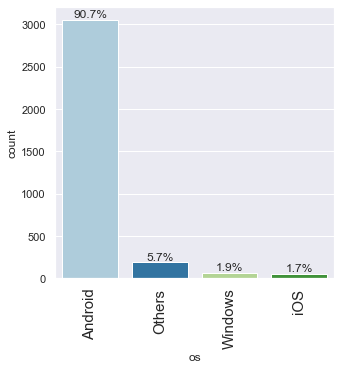

In [590]:
labeled_barplot(df, "os", perc=True)

**Conclusion**

- As said before Android is dominating the used_phone market with 91.2% marketshare

### <span style="font-family: Arial; font-weight:bold; color:red"> 3. How does the amount of RAM vary with the brand?

In [591]:
df1.ram=df1["ram"].astype("float")

In [592]:
df1.groupby("brand_name")["ram"].mean().sort_values(ascending=False)

brand_name
Huawei        4.641326
Google        4.615385
Honor         4.593220
Vivo          4.470874
Oppo          4.385321
Xiaomi        4.309091
Samsung       4.159341
OnePlus       4.000000
HTC           4.000000
Microsoft     4.000000
Coolpad       4.000000
Meizu         4.000000
Panasonic     4.000000
Realme        4.000000
Sony          4.000000
Apple         4.000000
XOLO          4.000000
Asus          4.000000
ZTE           3.936131
Gionee        3.933036
Acer          3.901961
LG            3.893868
Lenovo        3.886628
Motorola      3.826087
BlackBerry    3.791667
Others        3.751041
Micromax      3.750000
Spice         3.750000
Nokia         3.601351
Alcatel       3.426000
Karbonn       3.375000
Lava          3.352941
Celkon        1.466216
Name: ram, dtype: float64

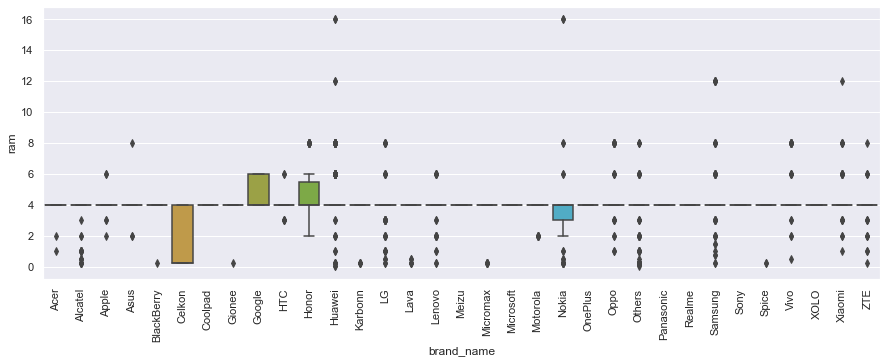

In [593]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df1, y="ram", x="brand_name")
plt.xticks(rotation=90)

plt.show()

**Conclusions**

- RAM do vary with brand from 1,5Go with Infinix to 6,4 Go with Oneplus
- Strangely the big market names (Apple, Samsung) do not have the highest RAM
- RAM may not be as important for the "consumer_value" as it seems to be

### <span style="font-family: Arial; font-weight:bold; color:red"> 4. How does the weight vary for phones offering large batteries (more than 4500 mAh)?

In [594]:
df_large_battery = df1[(df1.battery > 4500)]
grouped = pd.DataFrame(df_large_battery.groupby("brand_name")["weight"].mean().sort_values(ascending=False))
grouped.dropna(inplace=True)
grouped

,weight
brand_name,
Google,517.000000
Lenovo,460.213793
Sony,439.500000
HTC,425.000000
Apple,397.747368
Huawei,394.486486
Others,390.546341
Samsung,384.723077
Alcatel,380.000000


<Figure size 1800x360 with 0 Axes>

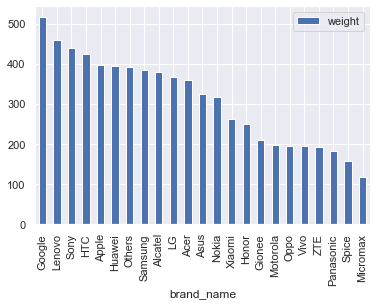

In [595]:
plt.figure(figsize=(25, 5))
figure = grouped.plot.bar()

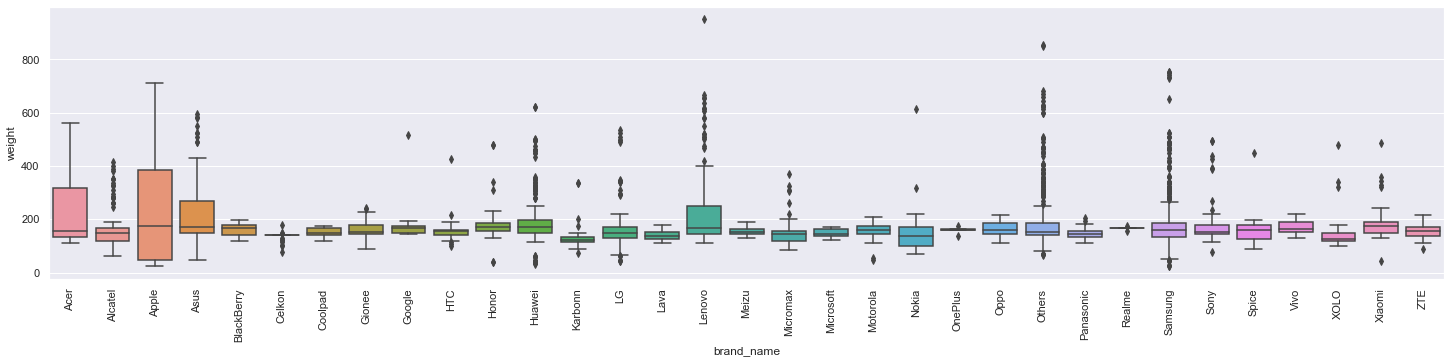

In [596]:
plt.figure(figsize=(25, 5))
sns.boxplot(data=df1, y="weight", x="brand_name")
plt.xticks(rotation=90)
plt.show()

In [597]:
grouped.std()

weight    112.600322
dtype: float64

In [598]:
grouped.var()

weight    12678.832525
dtype: float64

In [666]:
grouped.mean()

weight    309.295105
dtype: float64

**Conclusion**

- 25 brands are concerned by this "heavy_battery" question
- standard deviation and variance are high in that regards
- the lowest is Micromax with a 118 value and the highest is Google with 517 value

### <span style="font-family: Arial; font-weight:bold; color:red"> 5. How many phones are available across different brands with a screen size larger than 6 inches?

In [599]:
# The screen size is in cm
# convert the size from inches to cm
inch = float(input("Enter the amount in inches: ")) # will collection user data in inches

cm = inch*2.54 # converts from inches to cm
cm

Enter the amount in inches: 6


15.24

In [600]:
df_large_screen = df1[(df1.screen_size > cm)]
large_screen = pd.DataFrame(df_large_screen.groupby("brand_name")["screen_size"].count().sort_values(ascending=False))
large_screen

,screen_size
brand_name,
Huawei,159
Samsung,128
Others,116
Honor,87
Vivo,72
Lenovo,72
LG,68
Xiaomi,62
Oppo,50


In [601]:
large_screen['screen_size'].sum()

1059

<Figure size 1440x2880 with 0 Axes>

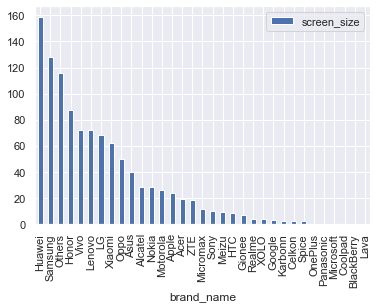

In [602]:
plt.figure(figsize=(20, 40))
figure1 = large_screen.plot.bar()

**Conclusion**

- 1059 used phones have a screen_size higher than 6 inches. 
- This topic is dominated by big names like Huawei or Samsung. This suggest that this is a key marketing indicator.

### <span style="font-family: Arial; font-weight:bold; color:red"> 6. What is the distribution of budget phones offering greater than 8MP selfie cameras across brands?

In [603]:
df_selfi = df1[df1.selfie_camera_mp > 8]
large_selfi = pd.DataFrame(df_selfi.brand_name.value_counts())
large_selfi

,brand_name
Huawei,91
Vivo,65
Samsung,60
Oppo,57
Xiaomi,44
Honor,43
Others,34
LG,32
HTC,20
ZTE,17


<Figure size 1440x2880 with 0 Axes>

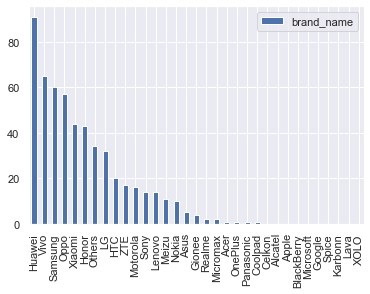

In [604]:
plt.figure(figsize=(20, 40))
figure2 = large_selfi.plot.bar()
plt.show()

In [605]:
large_selfi['brand_name'].sum()

545

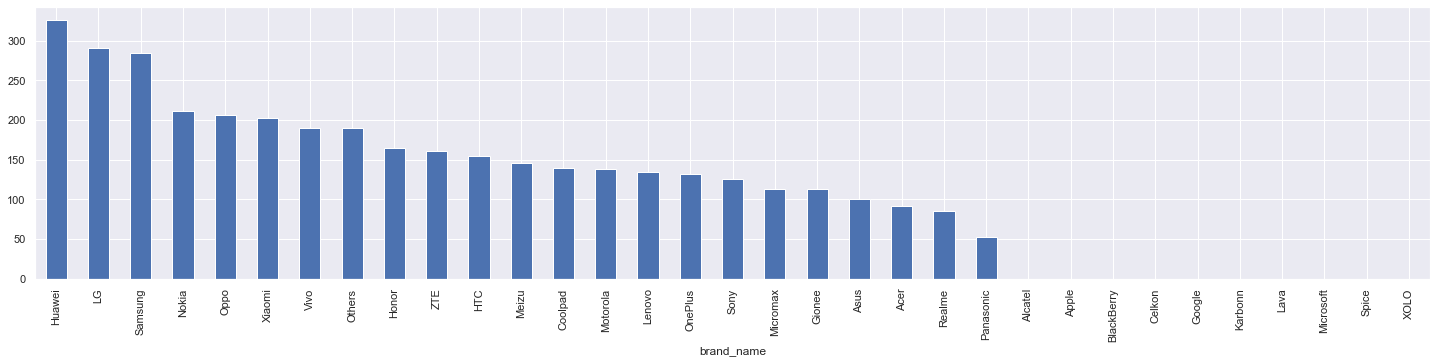

In [606]:
df_large_selfix = df1[(df1.selfie_camera_mp > 8)]
large_selfi_usedprice = df_large_selfix.groupby("brand_name")["used_price"].mean().sort_values(ascending=False)
plt.figure(figsize=(25, 5))
figure3 = large_selfi_usedprice.plot.bar()

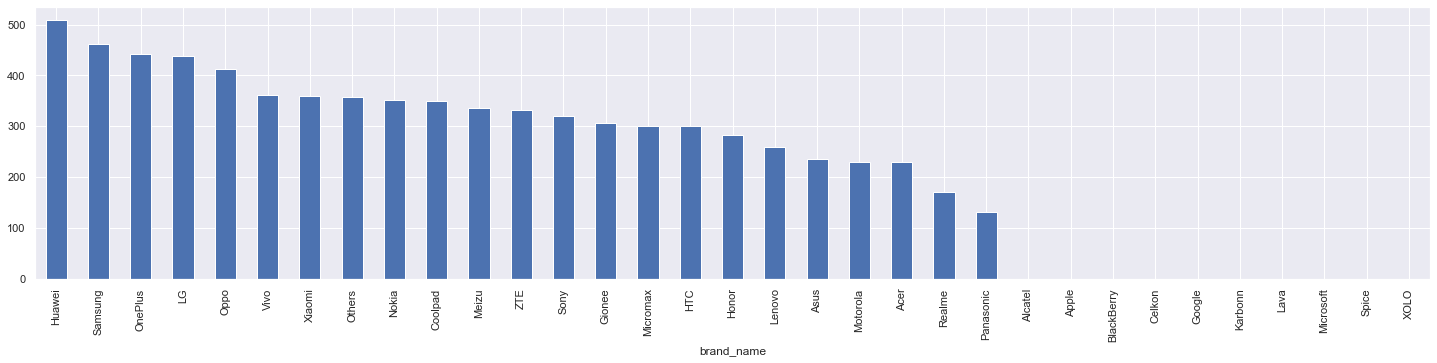

In [607]:
df_large_selfix = df1[(df1.selfie_camera_mp > 8)]
large_selfi_newprice = df_large_selfix.groupby("brand_name")["new_price"].mean().sort_values(ascending=False)
plt.figure(figsize=(25, 5))
figure4 = large_selfi_newprice.plot.bar()

**Conclusion**

- the distribution of budget phones offering greater than 8MP selfie cameras across brands is limited. 545 used phones on 3368. 
- this distribution is concentrated towards Huawei, Samsung, LG and Oppo. These brands represents 50% of total used phones offering this kind of selfie camera.


### <span style="font-family: Arial; font-weight:bold; color:red"> 7. Which attributes are highly correlated with the used phone price?

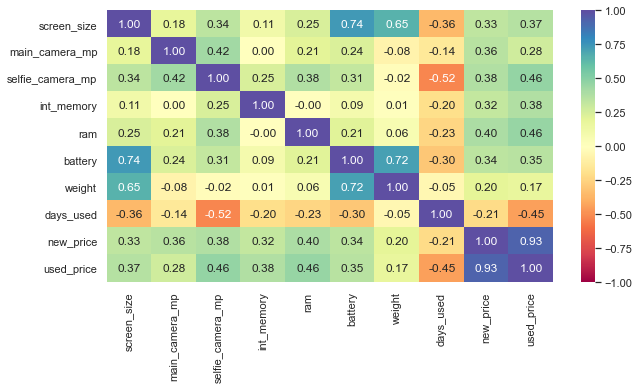

In [608]:
numeric_columns1 = df1.select_dtypes(include=np.number).columns.tolist()

# correlation heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(
    df1[numeric_columns1].corr(),
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap="Spectral",
)
plt.show()

**Conclusions**

- as already said new price is highly correlated with used_price (0.9)
- it appears that there are no other elements which are higly correlated (>0.75) with used_price

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [609]:
df.used_price=df["used_price"].astype("category")#switching to category to preserve outliers
df.new_price=df["new_price"].astype("category")#switching to category to preserve outliers

In [610]:
numeric_columnsX = df.select_dtypes(include=np.number).columns.tolist()
df.info() #checking results

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3368 entries, 0 to 3570
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   brand_name        3368 non-null   category
 1   os                3368 non-null   category
 2   screen_size       3368 non-null   float64 
 3   4g                3368 non-null   category
 4   5g                3368 non-null   category
 5   main_camera_mp    3368 non-null   float64 
 6   selfie_camera_mp  3368 non-null   float64 
 7   int_memory        3368 non-null   float64 
 8   ram               3368 non-null   category
 9   battery           3368 non-null   float64 
 10  weight            3368 non-null   float64 
 11  release_year      3368 non-null   category
 12  days_used         3368 non-null   int64   
 13  new_price         3368 non-null   category
 14  used_price        3368 non-null   category
dtypes: category(8), float64(6), int64(1)
memory usage: 611.8 KB


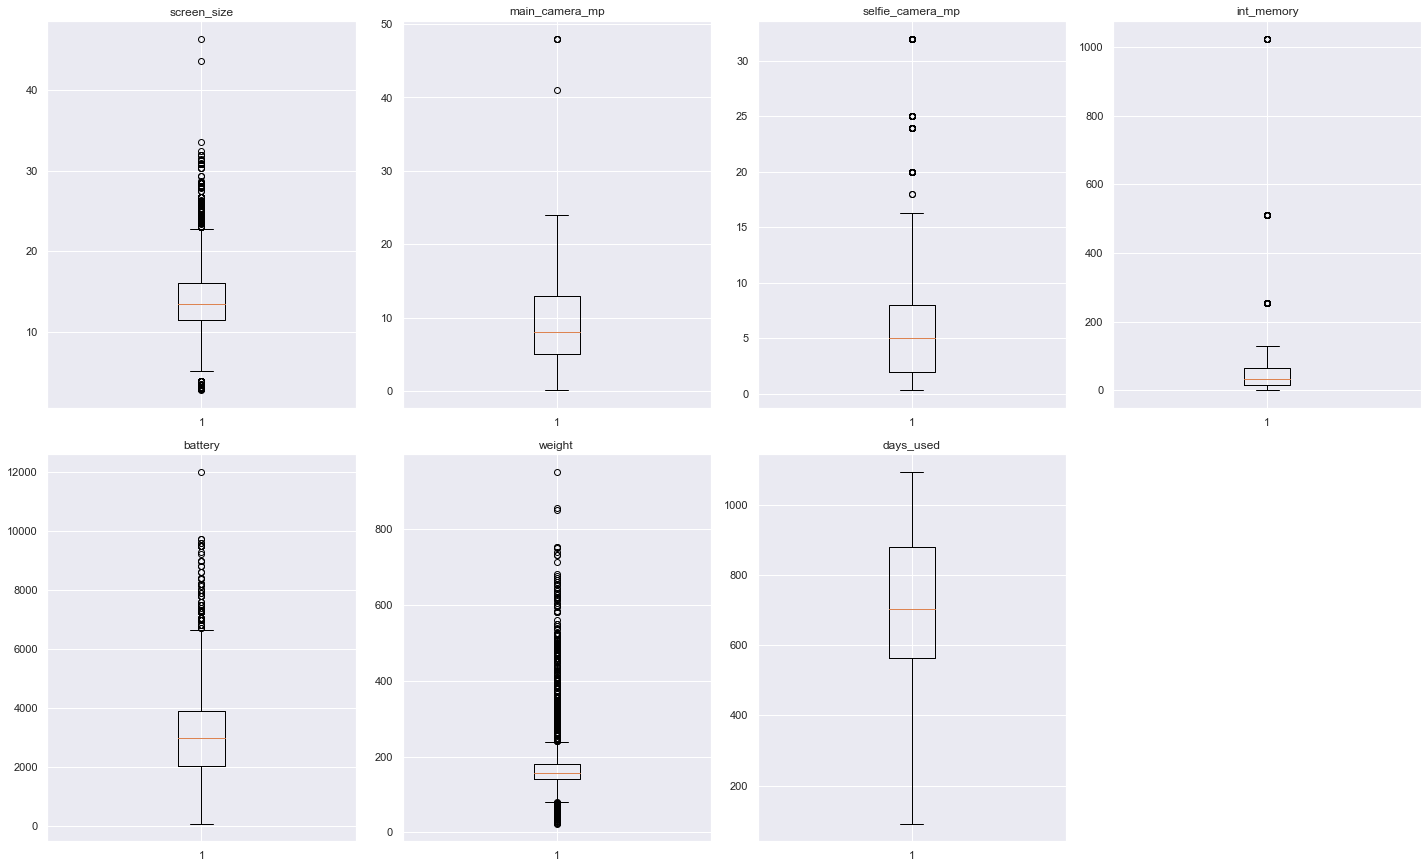

In [611]:
# let's plot the boxplots of all columns to check for outliers
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columnsX):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [612]:
def treat_outliers(df, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    treat outlier in all numerical variables
    col_list: list of numerical variables
    df: data frame
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

In [613]:
# treating the outliers
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
df = treat_outliers_all(df, numerical_col)

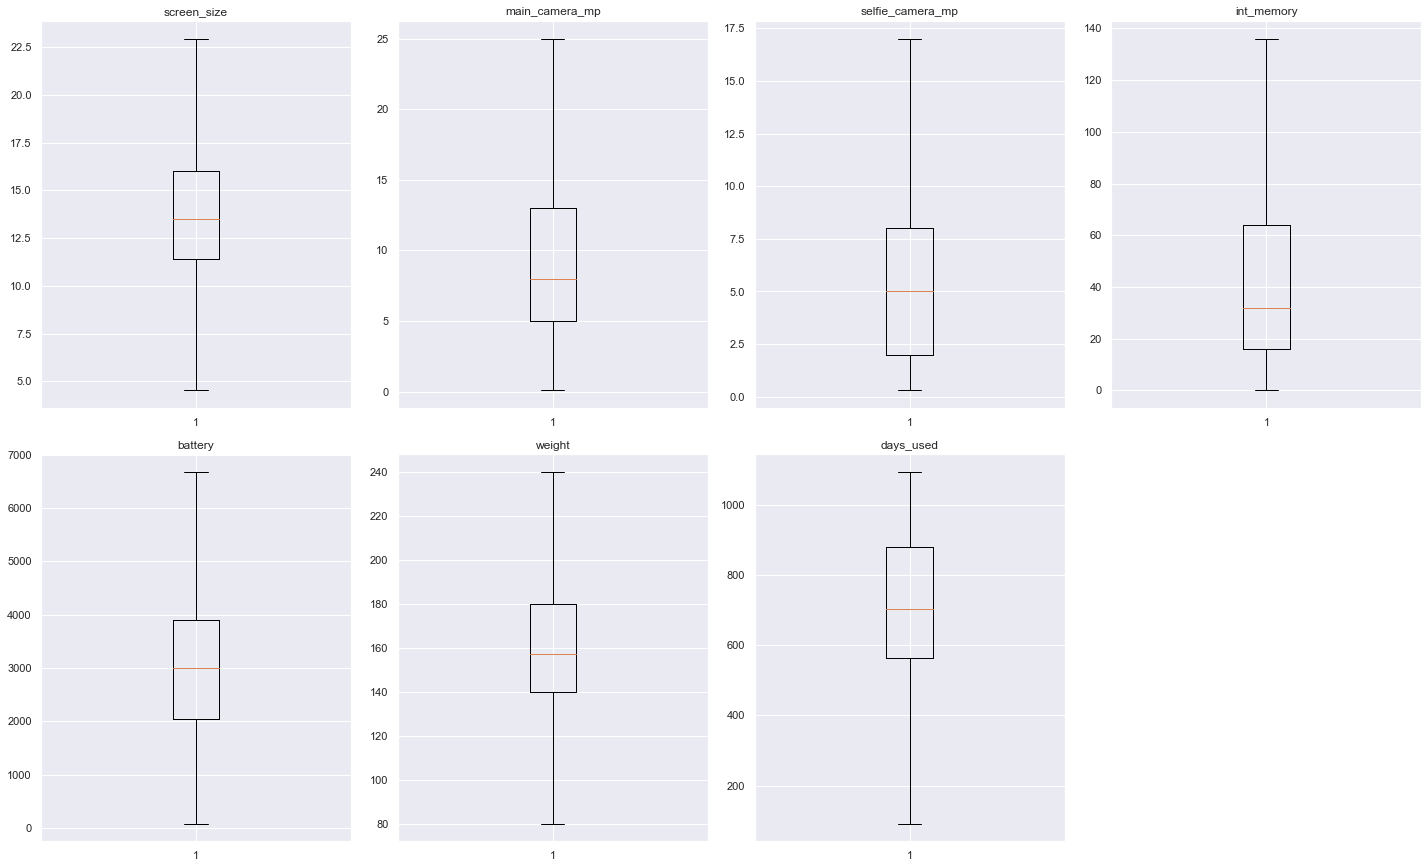

In [614]:
# let's look at the boxplots to see if the outliers have been treated or not
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columnsX):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [615]:
df.used_price=df["used_price"].astype("float64")#returning to float for later treatment
df.new_price=df["new_price"].astype("float64")#returning to float for later treatments

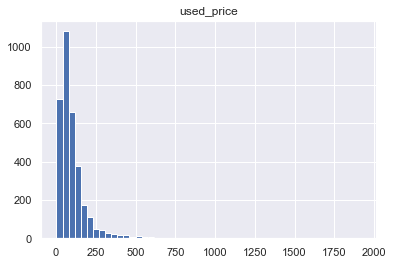

0


In [616]:
cols_to_log_used = ["used_price"]
#applying a log transformation to used price 
for colname in cols_to_log_used:
    plt.hist(df[colname], bins=50)
    plt.title(colname)
    plt.show()
    print(np.sum(df[colname] <= 0))

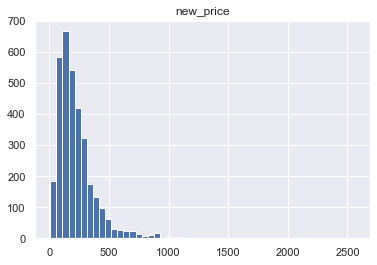

0


In [617]:
cols_to_log_new = ["new_price"]
#applying log transformation to new_price
for colname in cols_to_log_new:
    plt.hist(df[colname], bins=50)
    plt.title(colname)
    plt.show()
    print(np.sum(df[colname] <= 0))

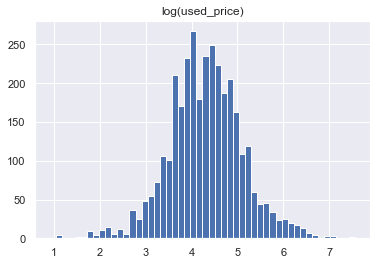

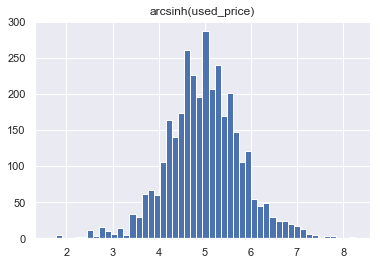

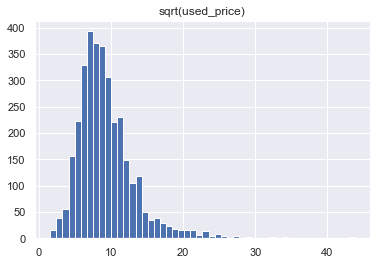

In [618]:
plt.hist(np.log(df['used_price']), 50)
plt.title('log(used_price)')
plt.show()
plt.hist(np.arcsinh(df['used_price']), 50)
plt.title('arcsinh(used_price)')
plt.show()
plt.hist(np.sqrt(df['used_price']), 50)
plt.title('sqrt(used_price)')
plt.show()

**Observations**

- log transformation appear to be the best choice as it normalized the data better than square root transformation

In [619]:
for colname in cols_to_log_used:
    df[colname + '_log'] = np.log(df[colname])
df.drop(cols_to_log_used, axis=1, inplace=True)

In [620]:
for colname in cols_to_log_new:
    df[colname + '_log'] = np.log(df[colname])
df.drop(cols_to_log_new, axis=1, inplace=True)

## Building a Linear Regression model

In [621]:
# defining X and y variables
X = df.drop(["used_price_log"], axis=1)
y = df["used_price_log"]

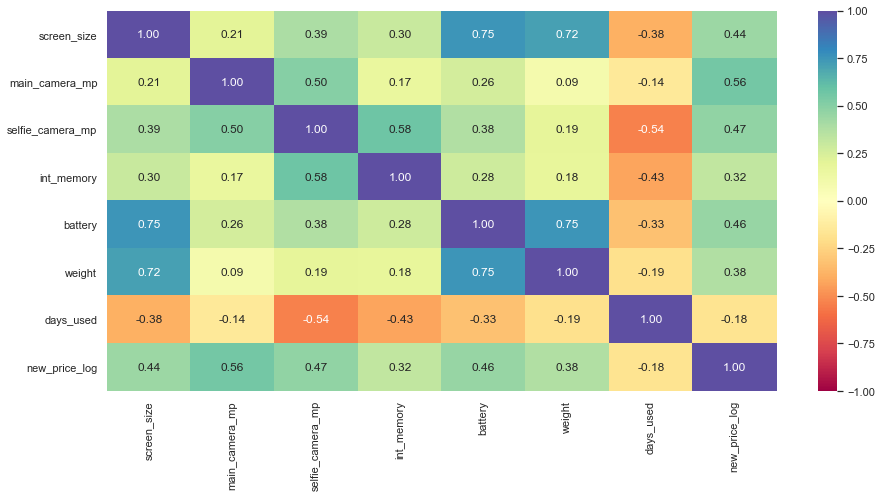

In [622]:
numeric_columns = X.select_dtypes(include=np.number).columns.tolist()

# correlation heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(
    X[numeric_columns].corr(),
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap="Spectral",
)
plt.show()

**Observations**

- the log transformation leads to a decorrelation between new_price and used_price. This pave the way for a better residual spread.

In [623]:
# with the following function we can select highly correlated featues. 
# it will remove the first featuer that is correlated with anything other feature. 

def correlation(dataset, threshold):
    col_corr = set() # set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range (i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [624]:
corr_features = correlation(X, 0.5)
len(set(corr_features))

6

In [625]:
corr_features

{'battery',
 'days_used',
 'int_memory',
 'new_price_log',
 'selfie_camera_mp',
 'weight'}

In [626]:
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

X.head()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,battery,weight,days_used,new_price_log,brand_name_Alcatel,brand_name_Apple,...,ram_8.0,ram_12.0,ram_16.0,release_year_2014,release_year_2015,release_year_2016,release_year_2017,release_year_2018,release_year_2019,release_year_2020
0,22.93,13.0,5.0,64.0,3020.0,146.0,127,4.715100,0,0,...,0,0,0,0,0,0,0,0,0,1
1,22.93,13.0,16.0,128.0,4300.0,213.0,325,5.519018,0,0,...,1,0,0,0,0,0,0,0,0,1
2,22.93,13.0,8.0,128.0,4200.0,213.0,162,5.884631,0,0,...,1,0,0,0,0,0,0,0,0,1
3,22.93,13.0,8.0,64.0,6675.0,240.0,345,5.630961,0,0,...,0,0,0,0,0,0,0,0,0,1
4,15.72,13.0,8.0,64.0,5000.0,185.0,293,4.947837,0,0,...,0,0,0,0,0,0,0,0,0,1


In [627]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1
)

In [628]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2357
Number of rows in test data = 1011


In [629]:
# fitting the model on the train data (70% of the whole data)
from sklearn.linear_model import LinearRegression

linearregression = LinearRegression()
linearregression.fit(x_train, y_train)

LinearRegression()

## Model performance evaluation

In [630]:
coef_df = pd.DataFrame(
    np.append(linearregression.coef_, linearregression.intercept_),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)

coef_df

,Coefficients
screen_size,-0.000111
main_camera_mp,0.001165
selfie_camera_mp,0.000377
int_memory,-0.000059
battery,0.000001
weight,0.000004
days_used,-0.001071
new_price_log,0.992863
brand_name_Alcatel,-0.015824
brand_name_Apple,0.062958


In [631]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [632]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
linearregression_train_perf = model_performance_regression(
    linearregression, x_train, y_train
)
linearregression_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.080999,0.068344,0.989453,0.989154,1.67172


In [633]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
linearregression_test_perf = model_performance_regression(
    linearregression, x_test, y_test
)
linearregression_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.085723,0.070181,0.98986,0.989162,1.778215


In [634]:
# unlike sklearn, statsmodels does not add a constant to the data on its own
# we have to add the constant manually
x_train1 = sm.add_constant(x_train)
# adding constant to the test data
x_test1 = sm.add_constant(x_test)

olsmod0 = sm.OLS(y_train, x_train1).fit()
print(olsmod0.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     3307.
Date:                Sat, 02 Oct 2021   Prob (F-statistic):               0.00
Time:                        00:10:35   Log-Likelihood:                 2579.4
No. Observations:                2357   AIC:                            -5027.
Df Residuals:                    2291   BIC:                            -4646.
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.15

In [635]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [636]:
pd.options.display.max_rows = 4000
checking_vif(x_train1)

,feature,VIF
0,const,2742.903538
1,screen_size,3.658766
2,main_camera_mp,2.530868
3,selfie_camera_mp,4.045027
4,int_memory,2.850987
5,battery,3.616791
6,weight,3.082217
7,days_used,2.808214
8,new_price_log,3.339386
9,brand_name_Alcatel,3.426496


In [637]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [638]:
col_list = [
    "brand_name_Apple",
    "brand_name_Huawei",
    "brand_name_LG",
    "brand_name_Others",
    "brand_name_Samsung",
    "os_iOS",
    "ram_0.25",
    "ram_0.5",
    "ram_1.0",
    "ram_2.0",
    "ram_3.0",
    "ram_4.0",
    "ram_6.0",
    "ram_8.0",
    "ram_12.0",
    "release_year_2019"
    
    
]

res = treating_multicollinearity(x_train1, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,ram_6.0,0.989159,0.082140
1,ram_0.5,0.989159,0.082140
2,brand_name_Samsung,0.989159,0.082140
3,ram_2.0,0.989159,0.082140
4,ram_0.25,0.989159,0.082140
5,brand_name_LG,0.989159,0.082140
6,ram_3.0,0.989159,0.082140
7,ram_4.0,0.989158,0.082141
8,brand_name_Others,0.989158,0.082141
9,ram_1.0,0.989158,0.082142


In [639]:
col_to_drop = "ram_6.0"
x_train2 = x_train1.loc[:, ~x_train1.columns.str.startswith(col_to_drop)]
x_test2 = x_test1.loc[:, ~x_test1.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  ram_6.0


,feature,VIF
0,const,308.092722
1,screen_size,3.658730
2,main_camera_mp,2.529772
3,selfie_camera_mp,4.044400
4,int_memory,2.830987
5,battery,3.612954
6,weight,3.082191
7,days_used,2.806805
8,new_price_log,3.334294
9,brand_name_Alcatel,3.426448


In [640]:
col_list = [
    "brand_name_Apple",
    "brand_name_Huawei",
    "brand_name_LG",
    "brand_name_Others",
    "brand_name_Samsung",
    "os_iOS",
    "ram_4.0",
    "release_year_2019"
    
]

res = treating_multicollinearity(x_train2, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,brand_name_Samsung,0.989163,0.082122
1,brand_name_LG,0.989163,0.082122
2,brand_name_Others,0.989163,0.082123
3,brand_name_Huawei,0.989159,0.082140
4,os_iOS,0.989157,0.082145
5,brand_name_Apple,0.989157,0.082148
6,ram_4.0,0.989156,0.082151
7,release_year_2019,0.989059,0.082516


In [641]:
col_to_drop = "brand_name_Samsung"
x_train3 = x_train2.loc[:, ~x_train2.columns.str.startswith(col_to_drop)]
x_test3 = x_test2.loc[:, ~x_test2.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train3)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  brand_name_Samsung


,feature,VIF
0,const,264.424544
1,screen_size,3.650993
2,main_camera_mp,2.529739
3,selfie_camera_mp,4.042730
4,int_memory,2.830860
5,battery,3.612909
6,weight,3.080947
7,days_used,2.804122
8,new_price_log,3.321999
9,brand_name_Alcatel,1.347073


In [642]:
col_list = [
    "brand_name_Apple",
    "os_iOS",
    "ram_4.0",
    "release_year_2019"
    
]

res = treating_multicollinearity(x_train3, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,os_iOS,0.989162,0.082127
1,brand_name_Apple,0.989161,0.082131
2,ram_4.0,0.989160,0.082133
3,release_year_2019,0.989064,0.082500


In [643]:
col_to_drop = "os_iOS"
x_train4 = x_train3.loc[:, ~x_train3.columns.str.startswith(col_to_drop)]
x_test4 = x_test3.loc[:, ~x_test3.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train4)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  os_iOS


,feature,VIF
0,const,264.421171
1,screen_size,3.646368
2,main_camera_mp,2.520587
3,selfie_camera_mp,4.005451
4,int_memory,2.824214
5,battery,3.607897
6,weight,3.080164
7,days_used,2.804092
8,new_price_log,3.321285
9,brand_name_Alcatel,1.346816


In [644]:
col_list = [
    "ram_4.0",
    "release_year_2019"
    
    
]

res = treating_multicollinearity(x_train4, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,ram_4.0,0.989161,0.082133
1,release_year_2019,0.989063,0.082503


In [645]:
col_to_drop = "ram_4.0"
x_train5 = x_train4.loc[:, ~x_train4.columns.str.startswith(col_to_drop)]
x_test5 = x_test4.loc[:, ~x_test4.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train5)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  ram_4.0


,feature,VIF
0,const,202.741598
1,screen_size,3.640060
2,main_camera_mp,2.518542
3,selfie_camera_mp,3.946673
4,int_memory,2.788339
5,battery,3.607853
6,weight,3.079728
7,days_used,2.803515
8,new_price_log,3.321276
9,brand_name_Alcatel,1.346551


In [646]:
col_list = [
    "release_year_2019"
    
]

res = treating_multicollinearity(x_train5, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,release_year_2019,0.989067,0.082488


In [647]:
col_to_drop = "release_year_2019"
x_train6 = x_train5.loc[:, ~x_train5.columns.str.startswith(col_to_drop)]
x_test6 = x_test5.loc[:, ~x_test5.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train6)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  release_year_2019


,feature,VIF
0,const,167.175813
1,screen_size,3.588261
2,main_camera_mp,2.515194
3,selfie_camera_mp,3.166607
4,int_memory,2.675817
5,battery,3.558736
6,weight,3.062842
7,days_used,2.258153
8,new_price_log,3.065596
9,brand_name_Alcatel,1.346470


In [648]:
olsmod1 = sm.OLS(y_train, x_train6).fit()
print(olsmod1.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     3553.
Date:                Sat, 02 Oct 2021   Prob (F-statistic):               0.00
Time:                        00:10:49   Log-Likelihood:                 2567.4
No. Observations:                2357   AIC:                            -5013.
Df Residuals:                    2296   BIC:                            -4661.
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.08

In [649]:
# initial list of columns
cols = x_train6.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = x_train6[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'selfie_camera_mp', 'battery', 'days_used', 'new_price_log', 'brand_name_Lenovo', 'ram_2.5', 'ram_8.0', 'release_year_2016', 'release_year_2017', 'release_year_2018', 'release_year_2020']


In [650]:
x_train7 = x_train6[selected_features]
x_test7 = x_test6[selected_features]

In [651]:
olsmod2 = sm.OLS(y_train, x_train7).fit()
print(olsmod2.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.940e+04
Date:                Sat, 02 Oct 2021   Prob (F-statistic):               0.00
Time:                        00:10:52   Log-Likelihood:                 2544.1
No. Observations:                2357   AIC:                            -5064.
Df Residuals:                    2345   BIC:                            -4995.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.1204      0.01

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

In [652]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
191,3.713328,3.818697,-0.105369
3282,3.047850,2.999056,0.048795
3359,4.642948,4.556674,0.086274
580,2.736314,2.848351,-0.112038
148,6.221524,6.284489,-0.062965


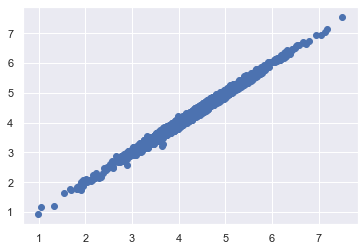

In [653]:
# define x and y for the plot

x = df_pred["Fitted Values"]
y = df_pred["Actual Values"]

plt.scatter(x, y)

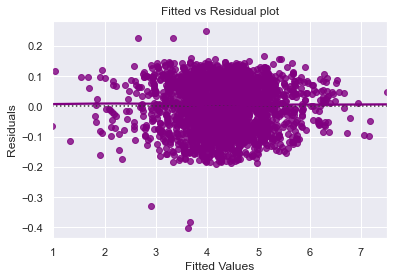

In [654]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

**Observations**

- The scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values).

- If there exist any pattern in this plot, we consider it as signs of non-linearity in the data and a pattern means that the model doesn't capture non-linear effects.

- **We see no pattern in the plot above. Hence, the assumptions of linearity and independence are satisfied**.

## Test for normality

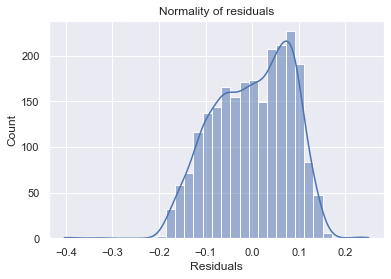

In [655]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

**Observations**

- The curve is close to normality however we will have to check this 

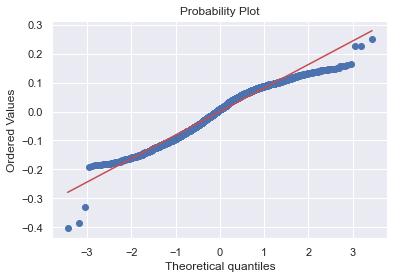

In [656]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

**Observations**

- Q-Q plot is not perfect. However we chose to keep this.
- We have to confirm this with a Shapiro Wilk test for normality

In [657]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.972999632358551, pvalue=1.1004955464453964e-20)

**Observations**

- Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
- Strictly speaking, the residuals are not normal.
- However, as an approximation, we can accept this distribution as close to being normal.
- So, the assumption is satisfied.

## Test for HOMOSCEDASTICITY

In [658]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train4)
lzip(name, test)

[('F statistic', 1.015436747000874), ('p-value', 0.3989950959936183)]

**Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied**.

In [659]:
# predictions on the test set
pred = olsmod2.predict(x_test7)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
1467,4.534426,4.563205
1041,4.314149,4.355145
3545,5.652700,5.632001
1202,4.698661,4.619710
3513,4.420766,4.322469
2447,5.826501,5.835731
1247,4.794467,4.786398
3471,5.029195,4.976948
1482,4.094678,3.959581
2651,5.012966,4.917751


**Observations**

- we can say that the predicted values are close to the actual ones. Which pave the way to a good results of the Linear Regression Model.

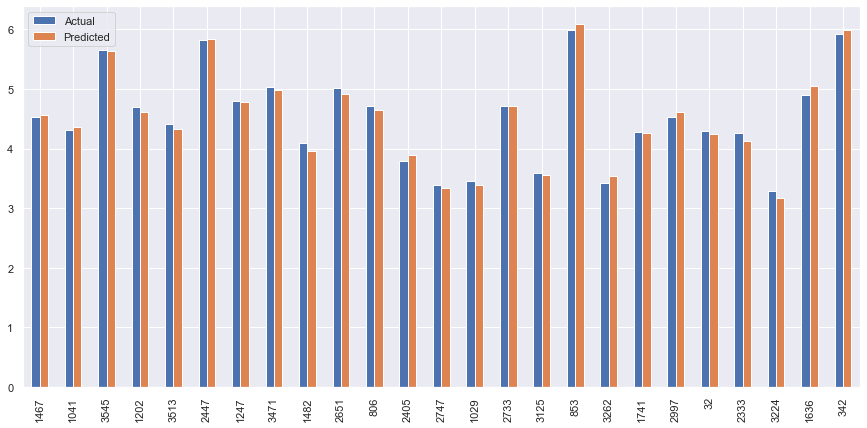

In [660]:
df1 = df_pred_test.sample(25, random_state=1)
df1.plot(kind="bar", figsize=(15, 7))
plt.show()

In [661]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, x_train7, y_train)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.082222,0.069614,0.989133,0.989077,1.70316


In [662]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_test_perf= model_performance_regression(olsmod2, x_test7, y_test)
olsmod2_test_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.085159,0.069899,0.989993,0.989873,1.767045


- The model is able to explain ~98% of the variation in the data, which is excellent.

- The train and test RMSE and MAE are low and comparable. So, our model is not suffering from overfitting.

- The MAPE on the test set suggests we can predict within 1,7% of the used_price.

- Hence, we can conclude the model olsmod2 is good for prediction as well as inference purposes.

## Final Model Summary

In [663]:
# training performance comparison

models_train_comp_df = pd.concat(
    [linearregression_train_perf.T, olsmod2_train_perf.T],
    axis=1,
)

models_train_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression statsmodels",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Linear Regression sklearn,Linear Regression statsmodels
RMSE,0.080999,0.082222
MAE,0.068344,0.069614
R-squared,0.989453,0.989133
Adj. R-squared,0.989154,0.989077
MAPE,1.671720,1.703160


In [664]:
# test performance comparison

models_test_comp_df = pd.concat(
    [linearregression_test_perf.T, olsmod2_test_perf.T],
    axis=1,
)

models_test_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression statsmodels",
]

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Linear Regression sklearn,Linear Regression statsmodels
RMSE,0.085723,0.085159
MAE,0.070181,0.069899
R-squared,0.989860,0.989993
Adj. R-squared,0.989162,0.989873
MAPE,1.778215,1.767045


## Final Model

In [665]:
olsmodel_final = sm.OLS(y_train, x_train7).fit()
print(olsmodel_final.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.940e+04
Date:                Sat, 02 Oct 2021   Prob (F-statistic):               0.00
Time:                        00:12:22   Log-Likelihood:                 2544.1
No. Observations:                2357   AIC:                            -5064.
Df Residuals:                    2345   BIC:                            -4995.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.1204      0.01

## Actionable Insights and Recommendations

- 

**Conclusions**

- the used_price is positively impacted by the new_price, the selfie_camera, a ram of 8Go and if it has been produced in 2020. 
- the battery may have a small influence on the used_price regarding the low level of its coefficient (10e-6)
- the used price is negatively impacted by days used (the more the lower), a 2,5Go RAM, a release_date between 2016 and 2018. 
- the lenovo brand looks quite deprecated as it has a negative impact on used_price

**recommandations**

- this show the importance of selfie_camera and ram of 8Go to preserve a used_price as close as possible to new_price. More investments should be done on these topics to help used_price to be preserved and so the phone value.
- battery in a lesser extent should be improved as its influence weight and screen size.
- time is an incompressive factor a price degradation and has to be taken into account in that regards
- The Lenovo brand should rethink its product to make them still attractive on the second hand market
